<a href="https://colab.research.google.com/github/eliottpark/VS265/blob/main/Decision_Boundaries_in_the_Membrane_Equation_and_the_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 7: Decision Boundaries in the Membrane Equation and the Perceptron - Eliott Park
SID: 3032717066


\[Implementation\]

The Perceptron is an (overly) simplified model of a real neuron where the response of the neuron is computed as a thresholded weighted sum of inputs:

$y=sign(u)$

$u=\sum_i w_i x_i + w_0$

The threshold is intended to model the all-or-nothing nature of the action potential.  We can think of the neuron as performing a simple form of classification:  It divides the space of possible input patterns into those that make the neuron fire (y=+1) and those that don't (y=-1).  Show what this looks like in the 2D input space $x_1, x_2$ by plotting the set of iso-response contours of $u$ - i.e., a set of curves, each of which delineates the set of input values $x_1, x_2$ that yield the same output value of $u$.  Show these curves for a number of different values of $u$, superimposed with the weight vector. (set the weights as you wish)  And then delineate the iso-response contour for the decision boudary $u=0$ as a red line.  You will see that the decision boundary is always a straight line, no matter how you set the weight vector.  Thus, a Perceptron can only learn to discriminate patterns that are *linearly separable*, and for many years this was considered a fatal limitation of this model.  For example, a Perceptron can't be trained to compute the XOR function because [1 1] and [0 0] are not linearly separable from [0 1] and [1 0]. Since the mid-1980's people figured out how to train multilayer networks that compose Perceptrons in multiple layers, so the network as a whole could peform more complex discriminations.  Today's deep networks are basically stacked Perceptron models, but they use half-wave rectication rather than sign as the thresholding function.

But... who cares about the Perceptron?  It was conceived of 60 years ago, when people knew very little about how brains work.  Today we know alot more.  We know about shunting inhibition, NMDA-receptor channels, voltage-gated channels in dendrites, and much more.  Maybe we should consider how these biophysical nonlinearities affect the computations a neuron can perform?  Let's give it a try.

First, compute the equilibrium voltage $V$ from the membrane equation assuming a compartment with two synaptic inputs - one that opens sodium channels ($\Delta G_{Na}$) and another that opens chloride channels ($\Delta G_{Cl}$).  For the chloride channel, just to make things simple, let's assume $V_r=V_{rest}=-70 mV$.  Now plot the iso-response contours of $V$ for the 2D space of $\Delta G_{Na}$, $\Delta G_{Cl}$.  Then superimpose on this the iso-response contour for $V=-35mV$, which is a plausible threshold voltage for the neuron, as a red line.  Is it straight or curved?  How does this change when the pair of inputs opens sodium and pottasium channels, $\Delta G_{Na}$, $\Delta G_{K}$?  What does this tell us about the computational flexibility of a neuron?

A next interesting exercise will be to explore the effect of NMDA-receptor channels.  These channels are permeable to calcium, which has a reversal potential around 0 mV.  But the channel is only operable above -40 mV (or so).  Below that, it is blocked by magnesium.  So the NMDA-receptor channel only has an effet when the membrane potential has already been depolarized by another input, such as from a neighboring AMPA channel.  This is not unlike an AND gate.  See what this effect looks like for the iso-response contours and decision boundary over the 2D joint space of an NMDA channel and an AMPA channel.  For this you will need to obtain a model of the NMDA channel's I-V curve, and for that you might look [here](https://books.google.com/books?hl=en&lr=&id=aeAJCAAAQBAJ&oi=fnd&pg=PP2&dq=koch,+biophysics+of+computation&ots=wxir8Rdgn4&sig=zswvYGmi0n3S22MywpD5SYVCcUo).





### I. Single-Layer Perceptron Model

Imports

In [ ]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

**Iso-Response Contours of U**

In order to demonstrate the contour response of **U** (the dot product of the weight vector **W** and the position vector **X**, I used a contour plot with **U** as the plotted function over the **x1**-**x2** plane. The weight vector is plotted in black.

I used two sliders to simulate a variety of possible weight combinations.

In [ ]:
@interact(w_1 = widgets.IntSlider(min=-15, max=15, step=1, value=1), 
          w_2 = widgets.IntSlider(min=-15, max=15, step=1, value=1),
          delta = fixed(1))
def plot_contour_slp(w_1, w_2, delta):
  # Set up ranges
  x_1 = np.arange(-30.0, 30.0, delta)
  x_2 = np.arange(-30.0, 30.0, delta)
  X_1, X_2 = np.meshgrid(x_1, x_2)

  # Compute U and plot
  U1 = np.multiply(X_1, w_1)
  U2 = np.multiply(X_2, w_2)
  U = U1+U2

  fig, ax = plt.subplots(figsize=(15,12))
  CS = ax.contour(X_1, X_2, U,
                  20,
                  cmap='CMRmap')
  
  ax.clabel(CS, inline=1, fontsize=10)

  # Plot the Weight Vector W
  ax.plot(x_1, (w_2/w_1)*x_1, color="black", label="W")

  ax.set_xlabel("x1")
  ax.set_ylabel("x2")
  ax.set_title('Iso-Response contours of U for W=[{0},{1}]'.format(w_1,w_2))
  ax.grid()
  ax.legend();

interactive(children=(IntSlider(value=1, description='w_1', max=15, min=-15), IntSlider(value=1, description='…



After testing a range of weight vectors, it can be shown that the linear separability of the perceptron model can be assumed to be true. The black weight vector is perpendicular to the red decision boundary of *u=0*, which separates all other **U** contours into positive and negative groupings.

### II. Equilibrium Voltage (Sodium, Chloride)

The Hodgkins Huxeley model of a neuron, paying attention only to Sodium and Chloride gates is represented below.

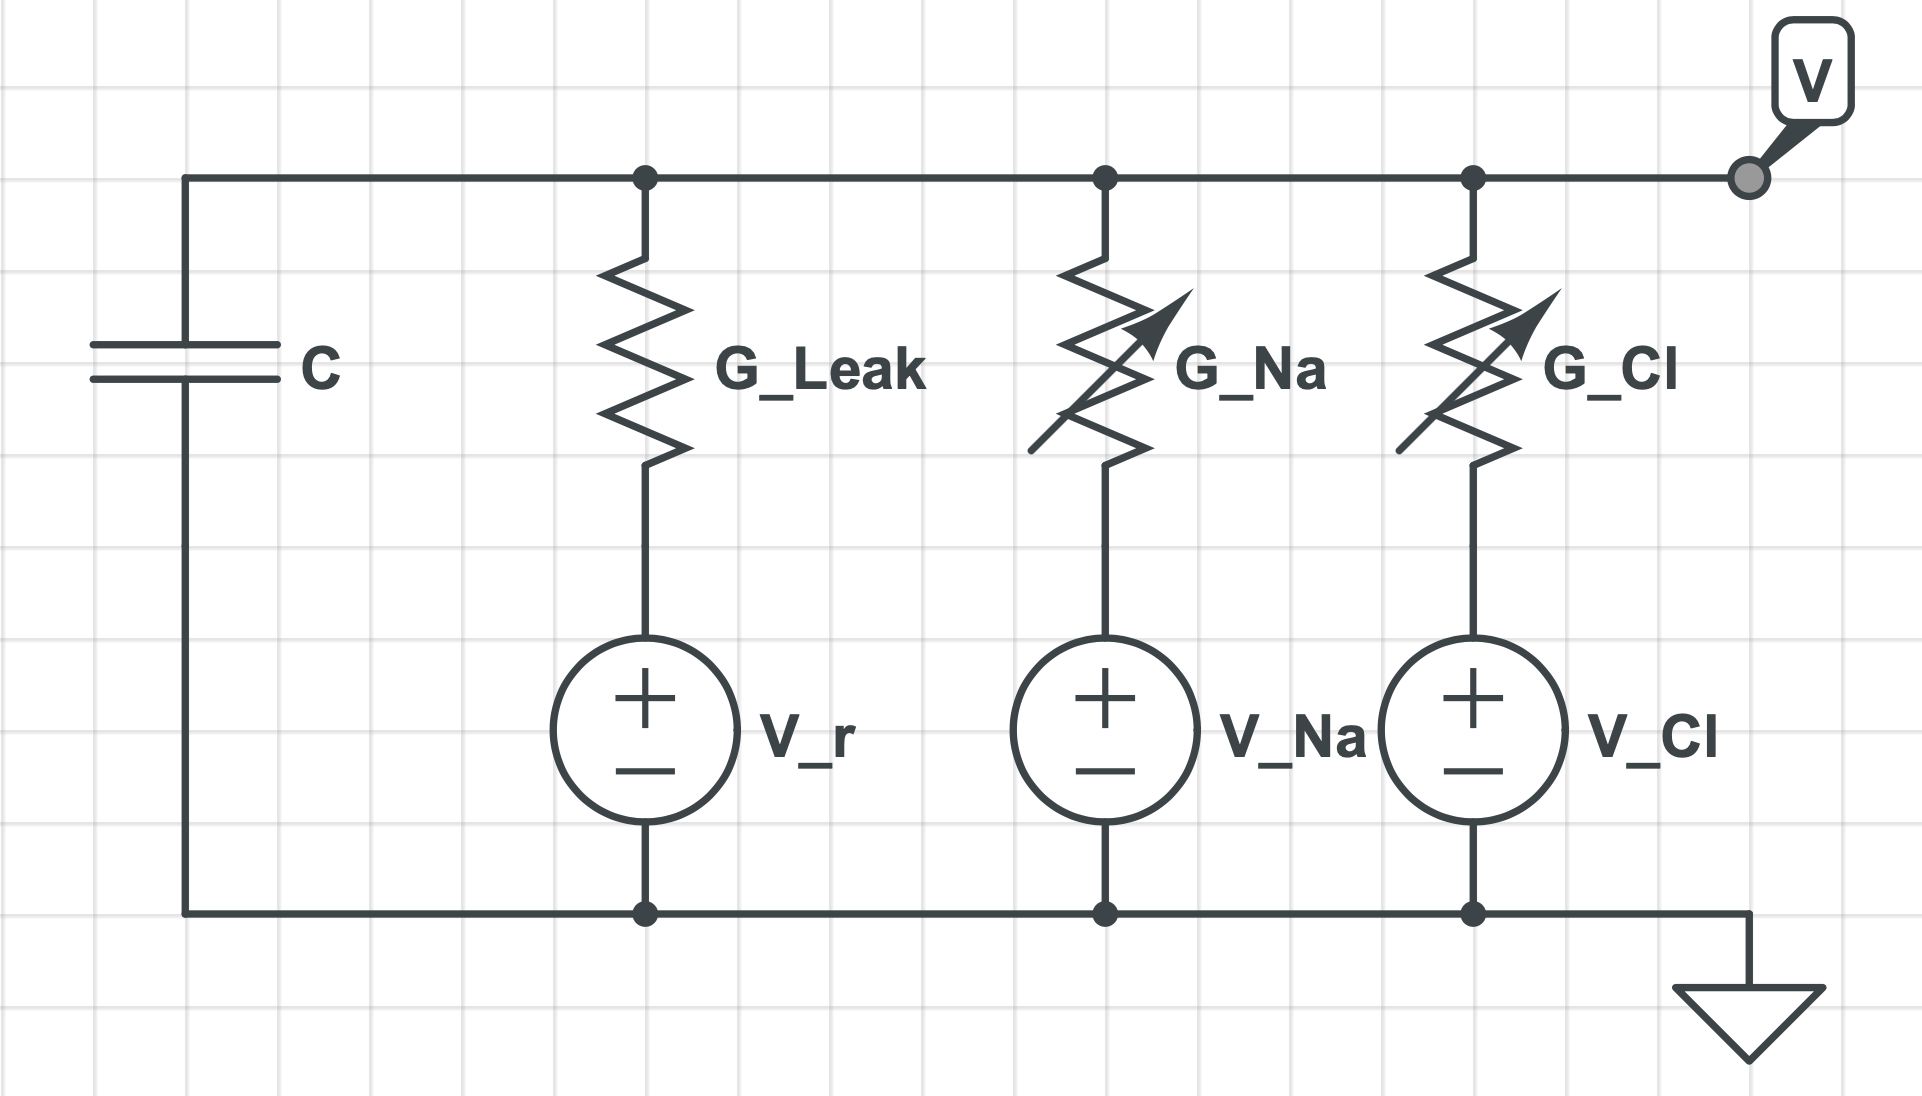

The equlibrium (membrane) voltage given the sodium and chloride channels of is computed using Kirchoff's law:

> $C \frac{dV}{dt} + \Delta G_{Na}(V-V_{Na}) +  \Delta G_{Cl}(V-V_{Cl}) + G_{leak}(V-V_{r})  = 0$

Given that the capacitance of the cell membrane is insignificant in this model:

> $ V = \frac{V_{Na} \Delta G_{Na} + V_{Cl} \Delta G_{Cl} + V_{r}G_{leak}}{\Delta G_{Na} +  \Delta G_{Cl} + G_{leak}} $

With the assumption that $V_{Cl} = -65mV$, $V_{Na} = +55mV$ and $V_{r} = -70mV$, the Membrane/Equilibrium voltage as a function of the variable conductances of Sodium and Chloride ($\Delta G_{Na}$, $\Delta G_{Cl}$) is defined as:

> $ V(\Delta G_{Na}, \Delta G_{Cl}) = \frac{55*
\Delta G_{Na} - 65* \Delta G_{Cl} - 70* G_{leak}}{\Delta G_{Na} + \Delta G_{Cl} + G_{leak}} $

Since $G_{leak}$ is a combination of the baseline conductances of all channels, there is no variability involved. Additionally, since the driving potential is the rest potential of the cell, the current is not pushed through these channels with uneven weight. Because of this, the value of $G_{leak}$ is arbitrary. I will assign it a value of 100 $\mu$Siemens. 

I will add variable inputs of the $\Delta G_{Na}$ and $ \Delta G_{Cl}$ between the ranges of 0 and 100 $\mu$Siemens. 


**Iso-Response Contours of V due to $\Delta G_{Na}, \Delta G_{Cl}$**

In [ ]:
@interact(
          g_leak = fixed(100),
          v_na = fixed(55),
          v_cl = fixed(-65),
          v_r = fixed(-70),
          delta = fixed(1))
def plot_contour_na_cl(g_leak, v_na, v_cl, v_r, delta):
  # Set up ranges
  g_na = np.arange(-10.0, 50.0, delta)
  g_cl = np.arange(-30.0, 30.0, delta)
  G_na, G_cl = np.meshgrid(g_na, g_cl)

  # Compute U and plot
  I_leak = v_r * g_leak
  I1 = np.multiply(G_na, v_na)
  I2 = np.multiply(G_cl, v_cl)
  G_total = G_na + G_cl + g_leak
  V = np.divide((I1+I2+I_leak), G_total)

  fig, ax = plt.subplots(figsize=(15,12))
  div_norm = matplotlib.colors.TwoSlopeNorm(-35)
  CS = ax.contour(G_na, G_cl, V,
                  25,
                  cmap='CMRmap',
                  norm=div_norm)
  
  ax.clabel(CS, inline=1, fontsize=10)

  ax.set_xlabel("$\Delta G_{Na}$")
  ax.set_ylabel("$\Delta G_{Cl}$")
  ax.set_title('Iso-Response contours of V over $\Delta G_{Na}$ and $\Delta G_{Cl}$')
  ax.grid();

interactive(children=(Output(),), _dom_classes=('widget-interact',))

The iso-response contours due to $\Delta G_{Na}$ and $\Delta G_{Cl}$ are linear but arranged non-parallely. This is in contrast with the perceptron, in which all of the output lines $u$ were evenly spaced parallel lines. This is attributed to the $y=a+b$ behavior of the perceptron vs. the $y=a/b$ behavior of the compartmental model. 

Both are linear, but the varied slope between contours of the compartmental model allows for greater flexibility when joining multiple compartments together in a computation. Rather than summing changes in conductance, equivalently to the perceptron, the compartmental model of the neuron combines conductances multaplicitively which gives a much broader range of membrane voltages, both in magnitude and in granularity. Due to this broader range, the neuron model has a computational edge over the perceptron. 

### III. Equilibrium Voltage $Na$, $K$

**Iso-Response Contours of V due to $\Delta G_{Na}, \Delta G_{K}$**

In [ ]:
@interact(
          g_leak = fixed(100),
          v_na = fixed(55),
          v_k = fixed(-92),
          v_r = fixed(-70),
          delta = fixed(1))
def plot_contour_na_cl(g_leak, v_na, v_k, v_r, delta):
  # Set up ranges
  g_na = np.arange(-10.0, 50.0, delta)
  g_k = np.arange(-30.0, 30.0, delta)
  G_na, G_k = np.meshgrid(g_na, g_k)

  # Compute U and plot
  I_leak = v_r * g_leak
  I1 = np.multiply(G_na, v_na)
  I2 = np.multiply(G_k, v_k)
  G_total = G_na + G_k + g_leak
  V = np.divide((I1+I2+I_leak), G_total)

  fig, ax = plt.subplots(figsize=(15,12))
  div_norm = matplotlib.colors.TwoSlopeNorm(-35)
  CS = ax.contour(G_na, G_k, V,
                  25,
                  cmap='CMRmap',
                  norm=div_norm)
  
  ax.clabel(CS, inline=1, fontsize=10)

  ax.set_xlabel("$\Delta G_{Na}$")
  ax.set_ylabel("$\Delta G_{K}$")
  ax.set_title('Iso-Response contours of V over $\Delta G_{Na}$ and $\Delta G_{K}$')
  ax.grid();

interactive(children=(Output(),), _dom_classes=('widget-interact',))

The contour response of the membrane potential for $G_{Na}$ and $G_K$ has less steep lines and a seemingly smaller angle of adjacency between contours. The larger $V_K$ value justifies the change in slope as the numerator would be marginally less than with $V_{Cl}$. This decrease would be exasperated as $\Delta G_{K}$ increases. 